In [1]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit.providers.fake_provider import GenericBackendV2 as GenericBackend
from qiskit_ibm_runtime import SamplerV2 as Sampler 
from qiskit_aer import AerSimulator

import random

from quantum_circuits import circuit
from IPython.display import display, Math, Latex

In [2]:
def create_bases(b):
    bases = ['Z'] * 32
    bases[22] = b[1]
    bases[23] = b[1]
    bases[21] = b[0]
    bases[24] = b[0]
    return bases

In [3]:
def basis_measure(b = "ZZ"):
    cq = circuit(32)
    cq.new_pawn([19,20,23])
    cq.move([20],[21,24])
    cq.capture([24], [23], [])
    cq.switch([19], [22])
    cq.capture([22], [21],[24])
    cq.measure_basis(create_bases(b))
    return cq.measure(simulator=True, out_internal_measure=True, efficient=True, shots = 100000)

In [4]:
print(basis_measure()[1])
S = 0
for i, b in enumerate(["ZT", "ZQ", "XT", "XQ"]):
    out = basis_measure(b)[1]
    P = list(out.keys())
    outcomes = list(out.values())
    # print(outcomes)
    current_expectation = 0
    for p, o in zip(P, outcomes):
        if (24 in o and 23 in o) or (24 not in o and 23 not in o):
            current_expectation += p * 1
        else:
            current_expectation += p * -1
    S += abs(current_expectation)
    print(f"Expectation value for basis {b}: {current_expectation}")
print(rf"S={S}")
display(Math("2 * \\sqrt{2} \\approx 2.8284271247461903"))

{0.49819: [23, 22], 0.50181: [22, 24]}
Expectation value for basis ZT: 0.7059400000000001
Expectation value for basis ZQ: -0.70754
Expectation value for basis XT: 0.73756
Expectation value for basis XQ: 0.70612
S=2.85716


<IPython.core.display.Math object>

In [5]:
import os
import ast

dir_path = os.getcwd()
file_path = os.path.join(dir_path, "Cache", "bell_test_results.txt")

# Open file and read contents
with open(file_path, 'r') as file:
    contents = file.read()

# Parse the contents as a Python literal
array = ast.literal_eval(contents)

print(array)

[1.0, 0.0, 1.0, 1.3333333333333333, 2.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 3.333333333333333, 2.833333333333333, 2.933333333333333, 3.1, 3.1666666666666665, 3.1666666666666665, 2.6666666666666665, 2.6666666666666665, 2.7666666666666666, 2.833333333333333, 2.880952380952381, 2.928571428571429, 2.9642857142857144, 3.0642857142857145, 3.1, 3.1277777777777778, 3.1500000000000004, 3.216666666666667, 2.9785714285714286, 3.05, 3.0681818181818183, 3.0833333333333335, 3.0961538461538463, 3.123931623931624, 3.1794871794871793, 3.1794871794871793, 3.201709401709402, 3.201709401709402, 3.21989121989122, 3.068376068376068, 3.112820512820513, 3.123809523809524, 3.14945054945055, 3.1589743589743593, 3.1589743589743593, 3.1953379953379955, 3.0589743589743588, 2.943589743589744, 2.943589743589744, 2.9875457875457876, 2.9875457875457876, 2.9875457875457876, 2.9958791208791213, 3.0178571428571432, 3.036904761904762, 3.044257703081

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from brokenaxes import brokenaxes
# import scienceplot ieee style
import scienceplots
plt.style.use(['science', 'ieee'])

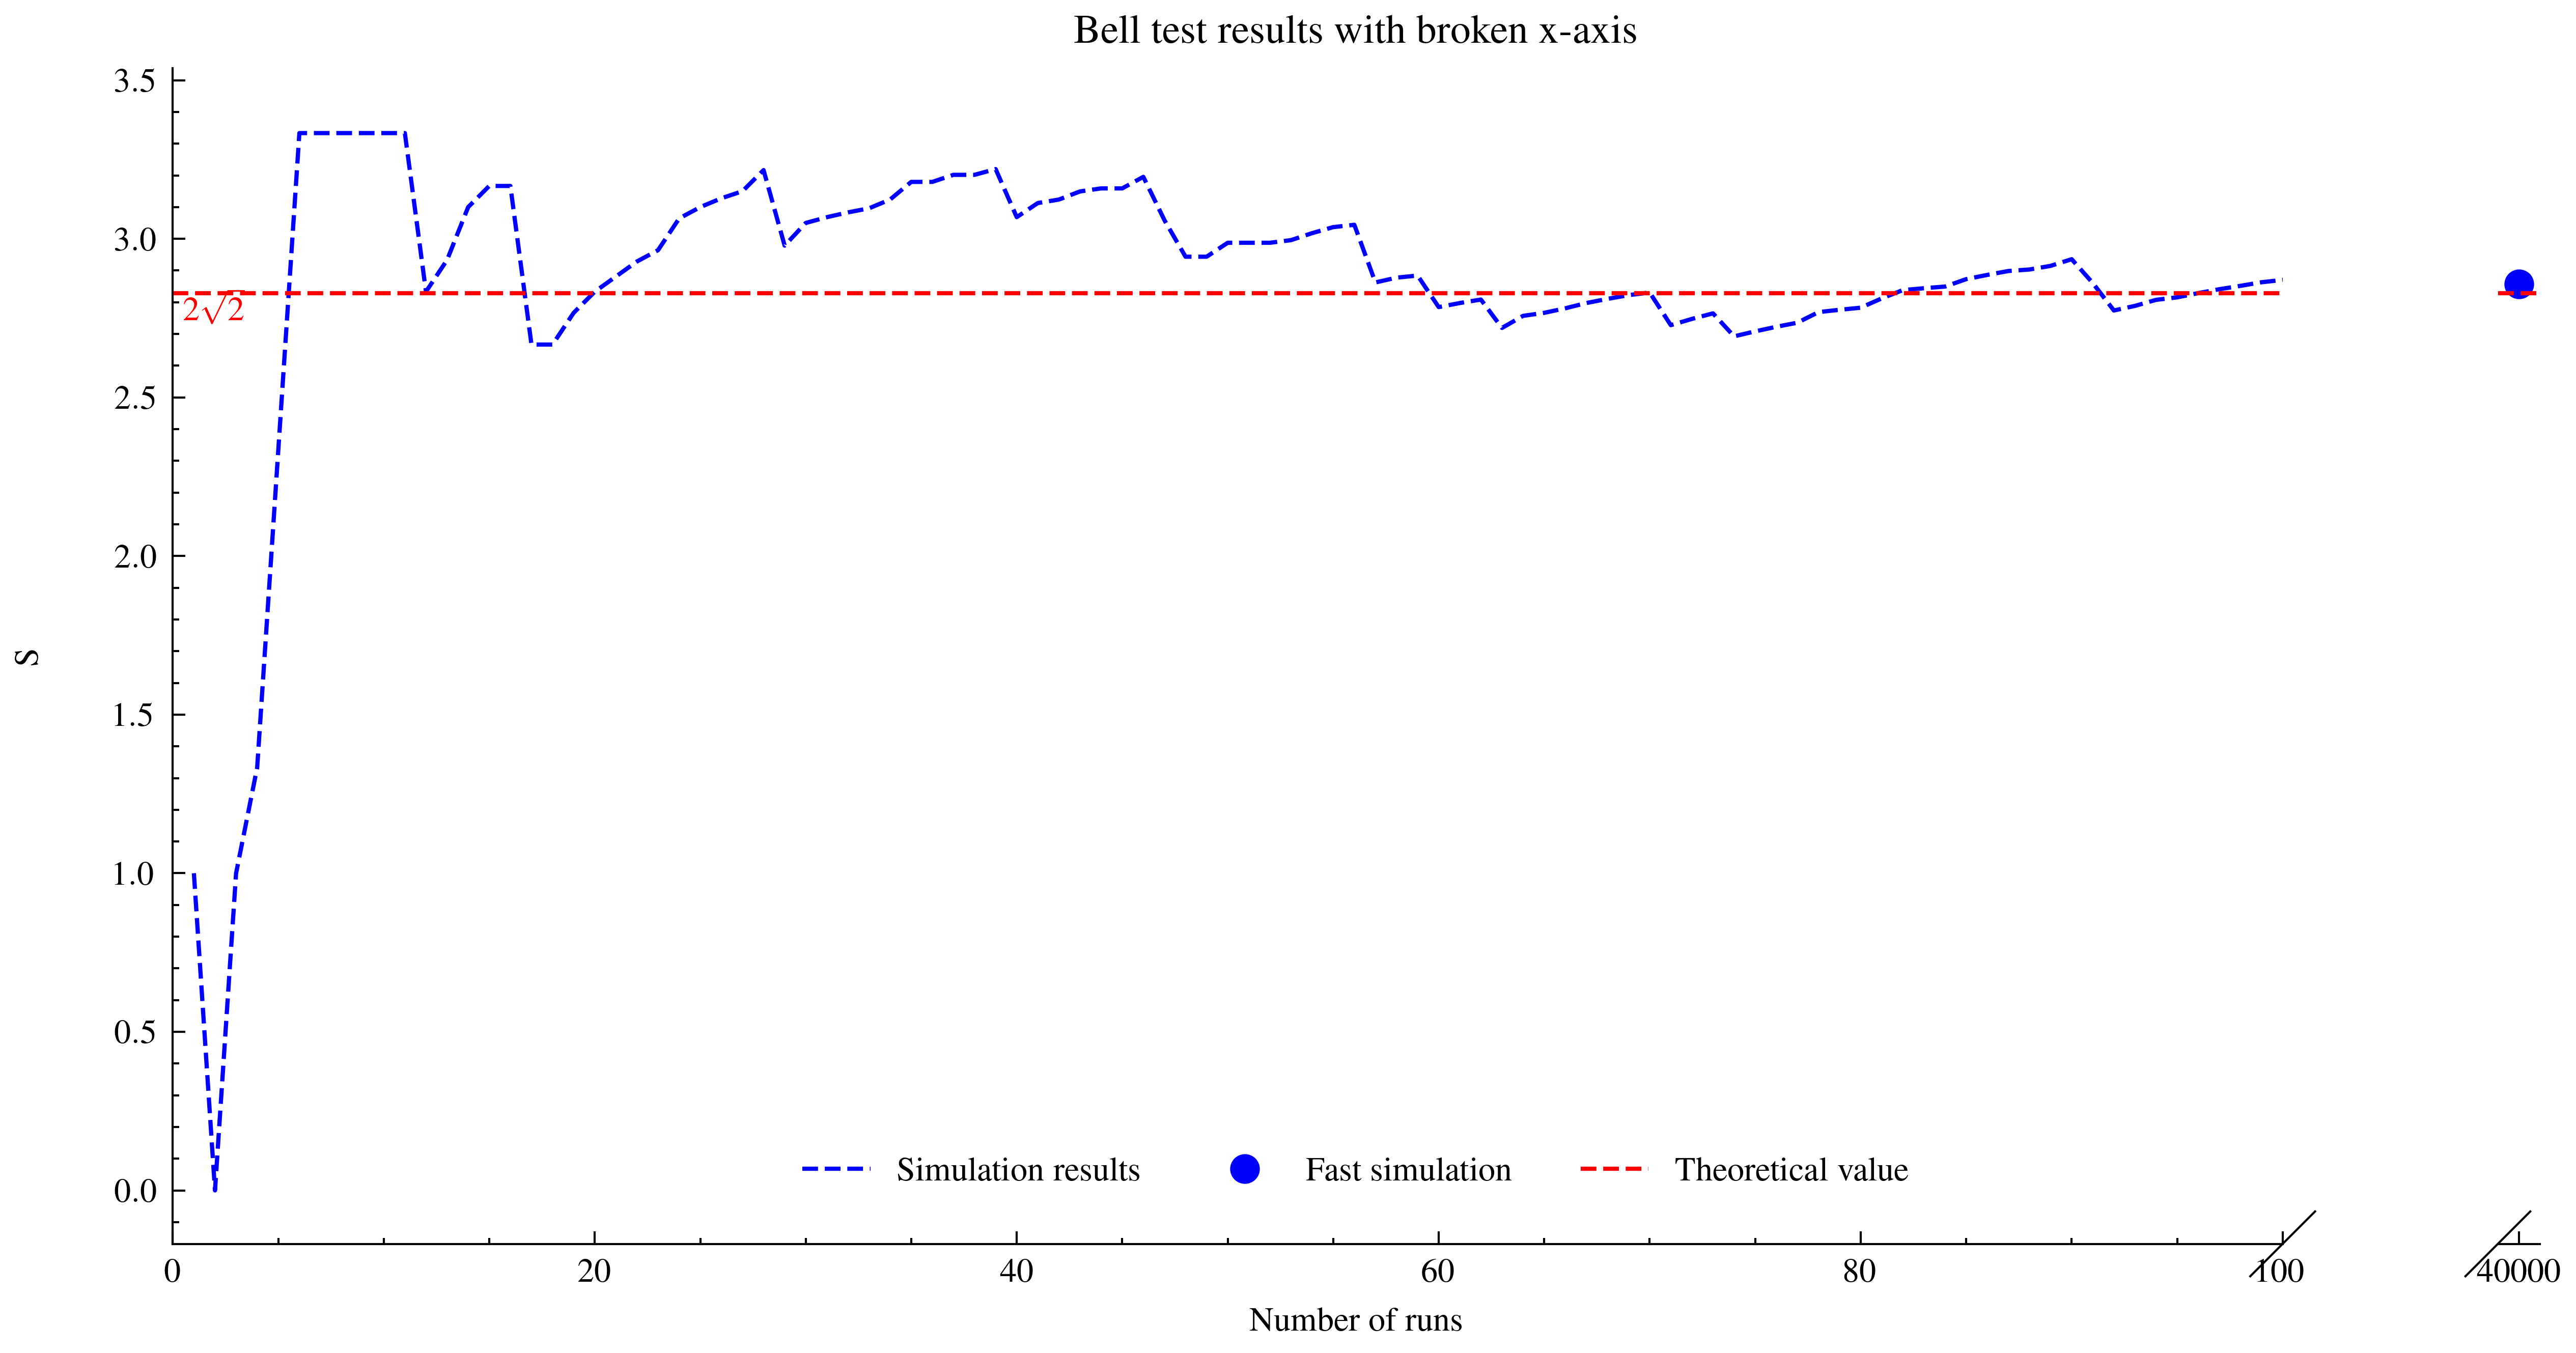

In [14]:
# Example data
x = np.linspace(1, len(array), len(array))
y = array

# Value for the second part (single point)
x_special = 40000
y_special = S

# Create a figure
fig = plt.figure(figsize=(10, 5))

# Create broken axis
bax = brokenaxes(xlims=((0, 100), (39999, 40001)), hspace=0.05)

# Plot the data
bax.plot(x, y, label="Simulation results", color='blue')
bax.plot(x_special, y_special, 'ro', color='blue', label="Fast simulation")
bax.axhline(y=2 * np.sqrt(2), color='red', linestyle='--', label="Theoretical value")
# add sqrt(2) 2 value at y axis
bax.text(0.5, 2 * np.sqrt(2), r"$2\sqrt{2}$", color="red", va='top', ha="left")

# Add labels and title
bax.set_xlabel("Number of runs")
bax.set_ylabel("S")
bax.set_title("Bell test results with broken x-axis")

# Add legend below
bax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.1), fancybox=True, shadow=True, ncol=5)

# Save the plot
plt.savefig(os.path.join(dir_path, "Cache", "bell_test_results.svg"))
plt.show()
